In [1]:
pcaCars <- princomp(mtcars, cor = TRUE)

In [6]:
pcaCars

Call:
princomp(x = mtcars, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
2.5706809 1.6280258 0.7919579 0.5192277 0.4727061 0.4599958 0.3677798 0.3505730 
   Comp.9   Comp.10   Comp.11 
0.2775728 0.2281128 0.1484736 

 11  variables and  32 observations.

In [7]:
names(pcaCars)

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

In [8]:
summary(pcaCars)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.5706809 1.6280258 0.79195787 0.51922773 0.47270615
Proportion of Variance 0.6007637 0.2409516 0.05701793 0.02450886 0.02031374
Cumulative Proportion  0.6007637 0.8417153 0.89873322 0.92324208 0.94355581
                           Comp.6     Comp.7     Comp.8      Comp.9     Comp.10
Standard deviation     0.45999578 0.36777981 0.35057301 0.277572792 0.228112781
Proportion of Variance 0.01923601 0.01229654 0.01117286 0.007004241 0.004730495
Cumulative Proportion  0.96279183 0.97508837 0.98626123 0.993265468 0.997995963
                           Comp.11
Standard deviation     0.148473587
Proportion of Variance 0.002004037
Cumulative Proportion  1.000000000

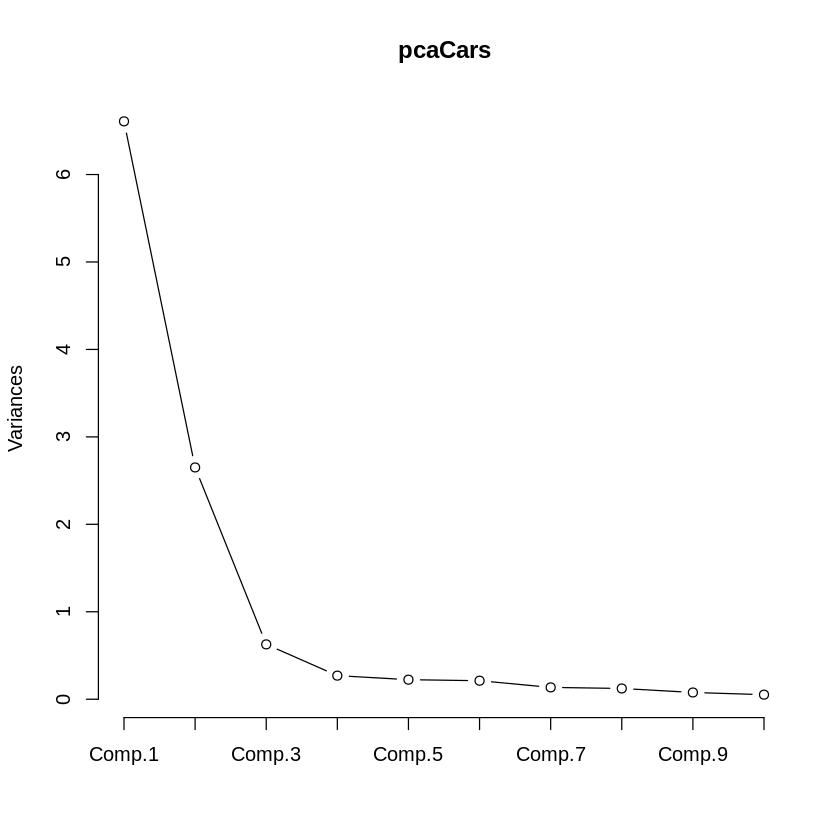

In [9]:
plot(pcaCars, type = "l")

In [10]:
carsHC <- hclust(dist(pcaCars$scores), method = "ward.D2")

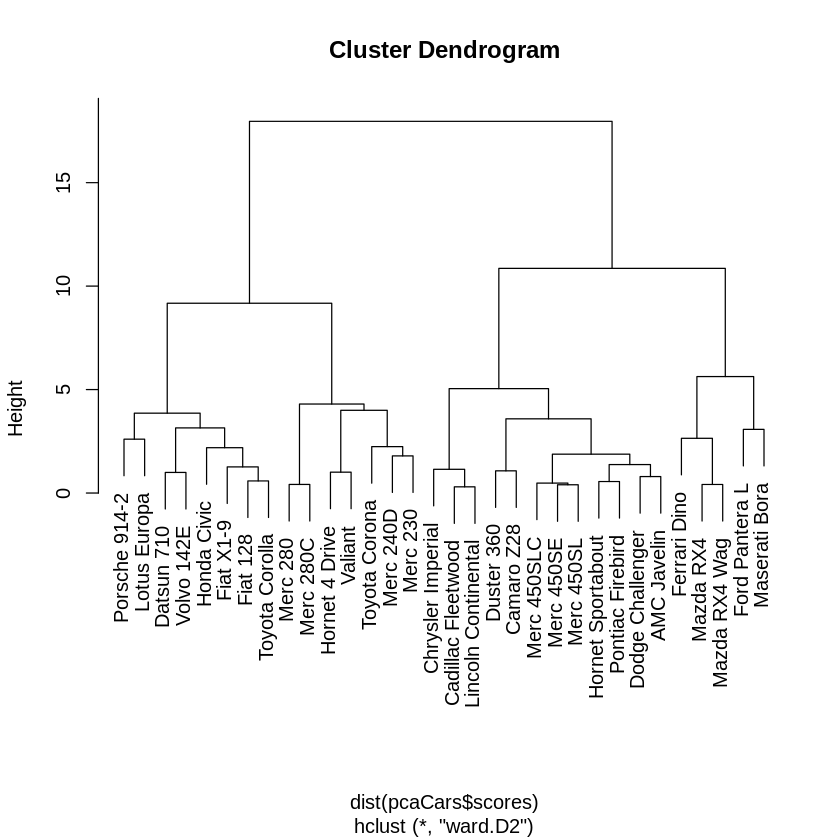

In [11]:
plot(carsHC)

In [12]:
carsClusters <- cutree(carsHC, k = 3)

In [13]:
carsDf <- data.frame(pcaCars$scores, "cluster" = factor(carsClusters))
carsDf <- transform(carsDf, cluster_name = paste("Cluster",carsClusters))

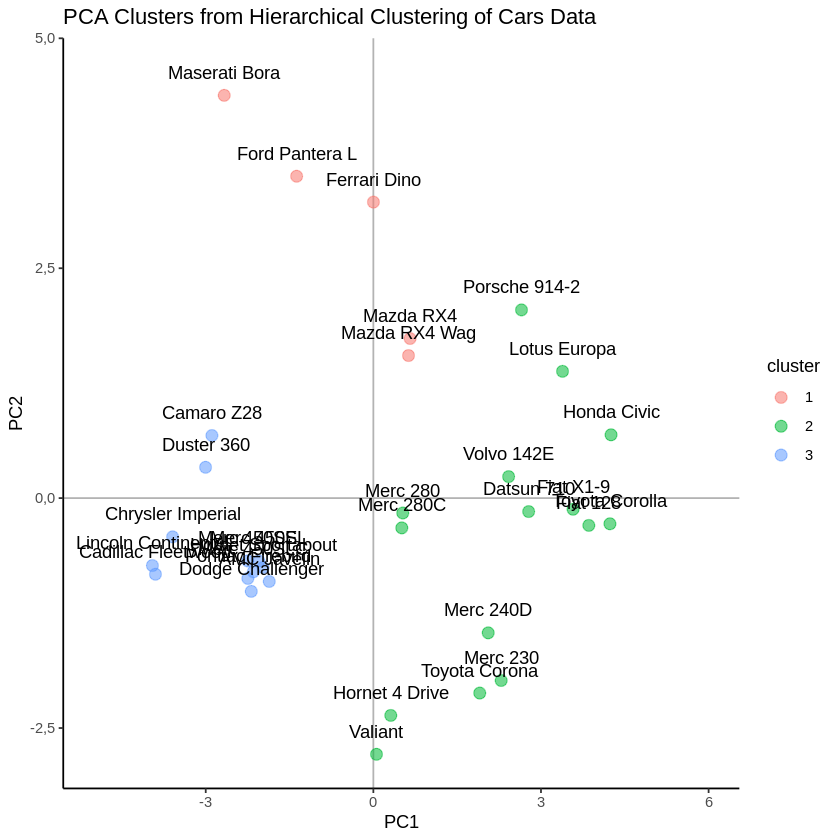

In [15]:
### library(ggplot2)
p1 <- ggplot(carsDf,aes(x=Comp.1, y=Comp.2)) +
      theme_classic() +
      geom_hline(yintercept = 0, color = "gray70") +
      geom_vline(xintercept = 0, color = "gray70") +
      geom_point(aes(color = cluster), alpha = 0.55, size = 3) +
      xlab("PC1") +
      ylab("PC2") + 
      xlim(-5, 6) + 
      ggtitle("PCA Clusters from Hierarchical Clustering of Cars Data") 
 
p1 + geom_text(aes(y = Comp.2 + 0.25, label = rownames(carsDf)))

#3-я четверть это ад

In [16]:
#install.packages("ggrepel", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


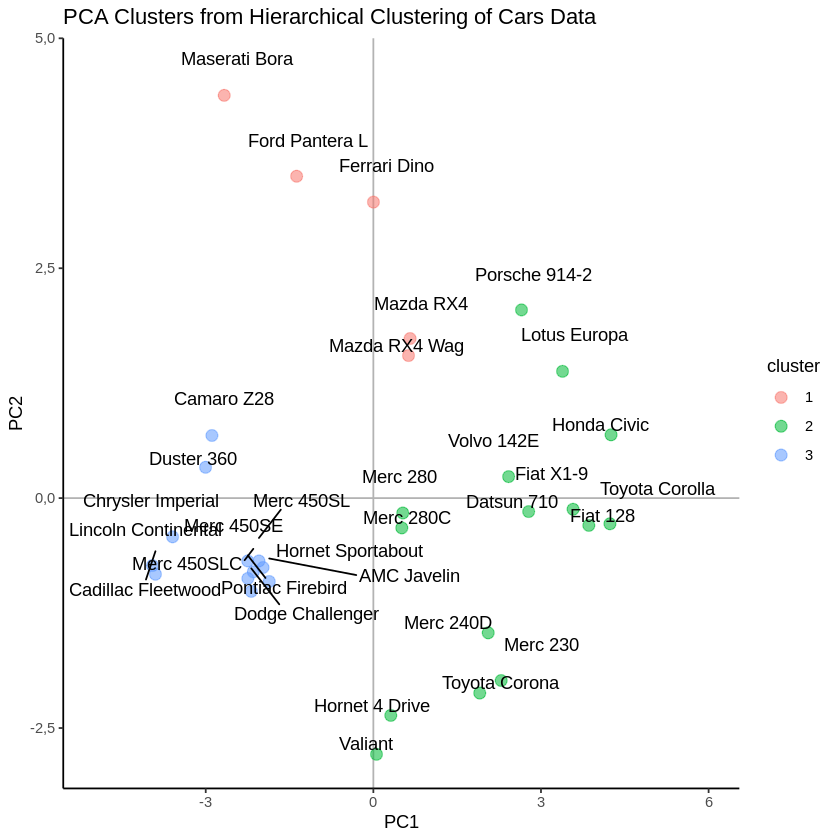

In [17]:
#library(ggplot2)
library(ggrepel)
 
p1 + geom_text_repel(aes(y = Comp.2 + 0.25, label = rownames(carsDf))) 
#намного лучше

In [ ]:
#install.packages("plotly", repos='http://cran.us.r-project.org')

In [ ]:
#а теперь посмотрим на plotly
library(plotly)
p <- plot_ly(carsDf, x = Comp.1 , y = Comp.2, text = rownames(carsDf),
             mode = "markers", color = cluster_name, marker = list(size = 11)) 
 
p <- layout(p, title = "PCA Clusters from Hierarchical Clustering of Cars Data", 
       xaxis = list(title = "PC 1"),
       yaxis = list(title = "PC 2"))
 
p